In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Part 1

Part 2

KMeans Clustering

In [24]:
def k_means_cluster(train_data, num_clusters, epsilon):
    # get number of features for each cluster and declare a 2d list cluster positions
    num_features = train_data.shape[1]
    centroids = np.empty((int(num_clusters), num_features))
    # generate starter values for each of the features between the minimum and maximum values for that feature
    for feature_index in range(num_features):
        max_val = np.max(train_data[:, feature_index])
        min_val = np.min(train_data[:, feature_index])
        for centroid_index in range(centroids.shape[0]):
            centroids[centroid_index][feature_index] = np.random.uniform(min_val, max_val)
    # create a variable to track the total distance between old and new centroids
    total_diff = 10
    # this while loop keeps reassigning entries to centroids and adjusting the centroids accordingly until the
    # centroids no longer move
    # run this loop as long as there was some change in the centroids in the last run
    while total_diff > epsilon:
        # reset total distance to zero
        total_diff = 0
        # create an array to store the centroid assignments of different entries
        centroid_assignments = np.zeros(train_data.shape[0], dtype=float)
        # store the centroid assignment of the current entry
        centroid_assignment = 0
        # assign all entries to their closest centroid
        for entry_index in range(train_data.shape[0]):
            for centroid_index in range(centroids.shape[0]):
                
                # if minkowski_metrics(train_data[entry_index], centroids[centroid_index], 2) < minkowski_metrics(train_data[entry_index], centroids[centroid_assignment], 2):
                
                if np.linalg.norm(train_data[entry_index] - centroids[centroid_index]) < np.linalg.norm(train_data[entry_index] - centroids[centroid_assignment]):
                    centroid_assignment = centroid_index
            centroid_assignments[entry_index] = centroid_assignment
        # find the average of all the points assigned to each centroid
        for centroid_index in range(centroids.shape[0]):
            # create an array to store the totals of all features of all assigned entries for the centroid
            centroid_ave = np.zeros(centroids.shape[1])
            counter = 0
            # add the features of each point assigned to the centroid to the total of all features for the centroid
            for entry_index in range(train_data.shape[0]):
                if centroid_assignments[entry_index] == centroid_index:
                    if counter > 0:
                        centroid_ave = centroid_ave + train_data[entry_index]
                        counter += 1
                    else:
                        centroid_ave = train_data[entry_index]
                        counter += 1
            # take the average features of all entries assigned to the cluster, or leave the cluster as is if no entries
            # were assigned.
            if counter == 0:
                centroid_ave = centroids[centroid_index]
            else:
                centroid_ave = centroid_ave / counter
            # add the change in the centroid to the total of all changes in all centroids
            # total_diff += minkowski_metrics(centroid_ave, centroids[centroid_index], 2)
            total_diff += np.linalg.norm(centroid_ave - centroids[centroid_index])
            # reassign the centroid position
            centroids[centroid_index] = centroid_ave
        # print(total_diff)
    # return centroids
    
    labels = []
    
    for data_point in train_data:
        
        min_distance = np.inf
        current_label = np.inf
        
        for centroid_idx in range(len(centroids)):
            
            distance = np.linalg.norm(centroids[centroid_idx] - data_point) 
            
            if distance < min_distance:
                current_label = centroid_idx
                min_distance = distance
                
        labels.append(current_label)
        
    return labels, centroids
                

In [27]:
def get_neighbors(data, point_idx, epsilon):
    neighbors = []
    for i, other_point in enumerate(data):
        if np.linalg.norm(data[point_idx] - other_point) <= epsilon:
            neighbors.append(i)
    return neighbors

def density_connected(data, labels, idx, cluster_id, epsilon, core_points):
    neighbors = get_neighbors(data, idx, epsilon)
    for neighbor in neighbors:
        if labels[neighbor] == 0:
            labels[neighbor] = cluster_id
            if neighbor in core_points:
                density_connected(data, labels, neighbor, cluster_id, epsilon, core_points)

def dbscan(data, minpts, epsilon):
    n = len(data)
    cluster_id = 1
    core_points = []
    labels = [0] * n
    
    for i in range(n):
        if len(get_neighbors(data, i, epsilon)) >= minpts:
            core_points.append(i)
        
    for idx in core_points:
        if labels[idx] == 0:
            cluster_id += 1
            labels[idx] = cluster_id
            density_connected(data, labels, idx, cluster_id, epsilon, core_points)
            
    for i in range(n):
        if labels[i] == 0:
            labels[i] = -1
        elif i not in core_points:
            labels[i] = 0
            
    # -1 = noise, 0 = border, 1+ = core
    
    return labels
        
            

Test DBSCAN

C:\Users\josh.aney\AppData\Local\Temp\ipykernel_50912\197359773.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('viridis', len(unique_labels))
C:\Users\josh.aney\AppData\Local\Temp\ipykernel_50912\197359773.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


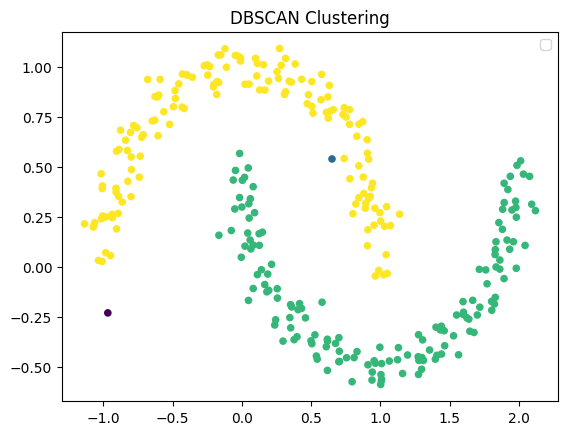

In [31]:
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=300, noise=0.07)

labels = dbscan(X, minpts=5, epsilon=0.2)

unique_labels = np.unique(labels)

colormap = cm.get_cmap('viridis', len(unique_labels))
label_to_color = {label: colormap(i) for i, label in enumerate(unique_labels)}
colors = [label_to_color[label] for label in labels]

# Plot
plt.scatter(X[:, 0], X[:, 1], c=colors, s=20)
plt.title("DBSCAN Clustering")
plt.legend()
plt.show()

Test KMEANS

C:\Users\josh.aney\AppData\Local\Temp\ipykernel_50912\128620556.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('viridis', len(unique_labels))


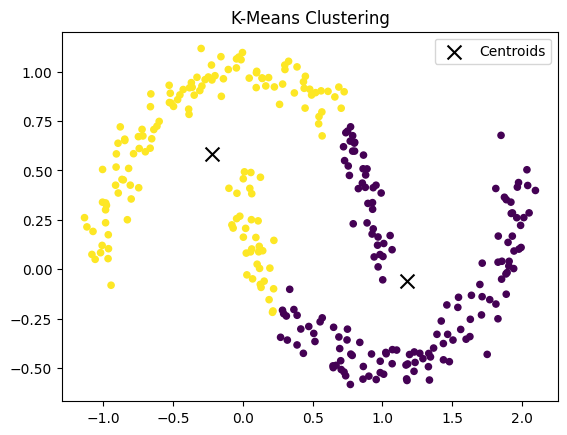

In [22]:
labels, centroids = k_means_cluster(X, 2, epsilon=0.1)
unique_labels = np.unique(labels)

# Build color map
colormap = cm.get_cmap('viridis', len(unique_labels))
label_to_color = {label: colormap(i) for i, label in enumerate(unique_labels)}
colors = [label_to_color[label] for label in labels]

# Plot
plt.scatter(X[:, 0], X[:, 1], c=colors, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

In [ ]:
def precision(predictions, labels):

    # the precision function is meant to calculate the precision metric for a specific prediction set. it returns a
    # zipped list of the specific precision values for each class

    # turn parameters into numpy arrays and get unique classes
    labels = np.array(labels)
    predictions = np.array(predictions)
    classes = np.unique(labels)
    class_precisions = []

    # for each class in the prediction set calculate the number of true positives divided by the sum of true positives
    # and false positives. then append it to the list of all precision values
    for class_instance in classes:
        tp = 0
        fp = 0
        for prediction, label in zip(predictions, labels):
            if prediction == class_instance and prediction == label:
                tp += 1
            elif prediction == class_instance and prediction != label:
                fp += 1
        if tp + fp != 0:
            class_precisions.append(float(tp/(tp + fp)))

    return list(zip(classes, class_precisions))

Part 3